# data load

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

pd.set_option('display.max_columns', 35)  ## 생략 없이 한 번에 띄울 피쳐수 = 35
df0 = pd.read_parquet( "../data/df0.parquet" )
df1 = pd.read_parquet( "../data/df1.parquet" )  ### 추가 피쳐: 페이백율, 할인률, 종합혜택률, 구매시각추출, 구매건카운트
df2 = pd.read_parquet( "../data/df2.parquet" )
df3 = pd.read_parquet( "../data/df3.parquet" )  ### 추가 피쳐: 가입시각추출, 상업코드

print(df0.shape, df1.shape, df2.shape, df3.shape, sep=" "*5)
# display(df0.head(2))
# display(df1.head(2))
# display(df2.head(2))
# display(df3.head(2))

(5623810, 14)     (5623810, 23)     (544921, 17)     (544921, 31)


In [2]:
## 지수 표기법 변경
np.set_printoptions(precision=6, suppress=True)
pd.options.display.float_format = '{:.3f}'.format

## 기준: 거래 금액
- df2의 post -> 유저 당 최종 결제 금액
- post의 분포 토대로 기준이 될 거래 금액 설정

In [3]:
# 75% 지점 기준으로 heavy vs light 분리
df2['post'].describe()

count      544921.000
mean       196438.240
std        527836.212
min             0.000
25%         20140.000
50%         60480.000
75%        191024.000
max     112273800.000
Name: post, dtype: float64

### 점수 매기기

In [4]:
df2_h = df2[df2['post']>=200000]
df2_l = df2[df2['post']<200000]

# Segmentation을 위한 feature 생성

## 기존 feature 중 그대로 사용할 feature
- man
- push
- frgn

### 성별

In [22]:
def genders1(sub_loc,title,df2):
    plt.subplot(sub_loc)
    plt.title(title)
    man = df2[df2['man'].values==1]['man'].count()
    woman = df2[df2['man'].values!=1]['man'].count()
    labels = ['woman'+'('+str(woman)+')','man'+'('+str(man)+')']
    plt.pie(df2['man'].value_counts(),labels=labels,autopct='%.1f%%',colors=['#ff6b6b','#48dbfb'])

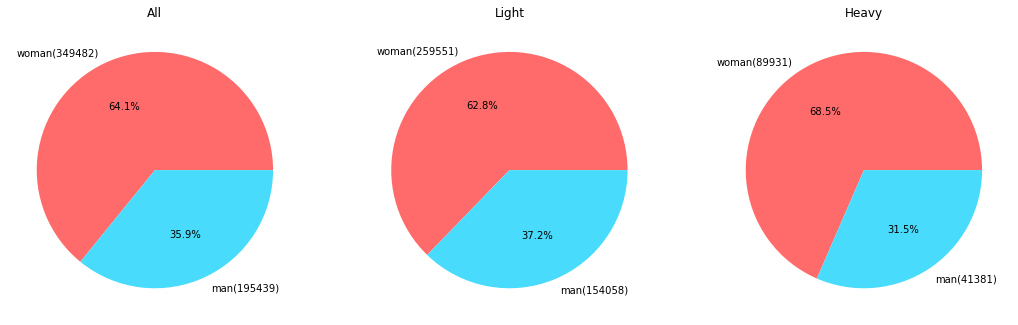

In [23]:
plt.figure(figsize=(18,6),facecolor="white")
genders1(131,'All',df2)
genders1(132,'Light',df2_l)
genders1(133,'Heavy',df2_h)
plt.show()

In [63]:
def genders2(sub_loc1,sub_loc2,title,df2):
    plt.subplot(sub_loc1)
    a = df2.groupby('man').sum()['post'].reset_index()
    a.iloc[0,0] = 'woman'
    a.iloc[1,0] = 'man'
    plt.title(f'sum of purchases ({title})')
    plt.bar(a['man'],a['post'],color=['#ff6b6b','#48dbfb'])
    current_values = plt.gca().get_yticks()
    plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

    plt.subplot(sub_loc2)
    b = df2.groupby('man').mean()['post'].reset_index()
    b.iloc[0,0] = 'woman'
    b.iloc[1,0] = 'man'
    plt.title(f'avg of purchases ({title})')
    plt.bar(b['man'],b['post'],color=['#ff6b6b','#48dbfb'])
    current_values = plt.gca().get_yticks()
    plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_3946/3903696897.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_3946/3903696897.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_3946/3903696897.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_3946/3903696897.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_3946/3903696897.py:

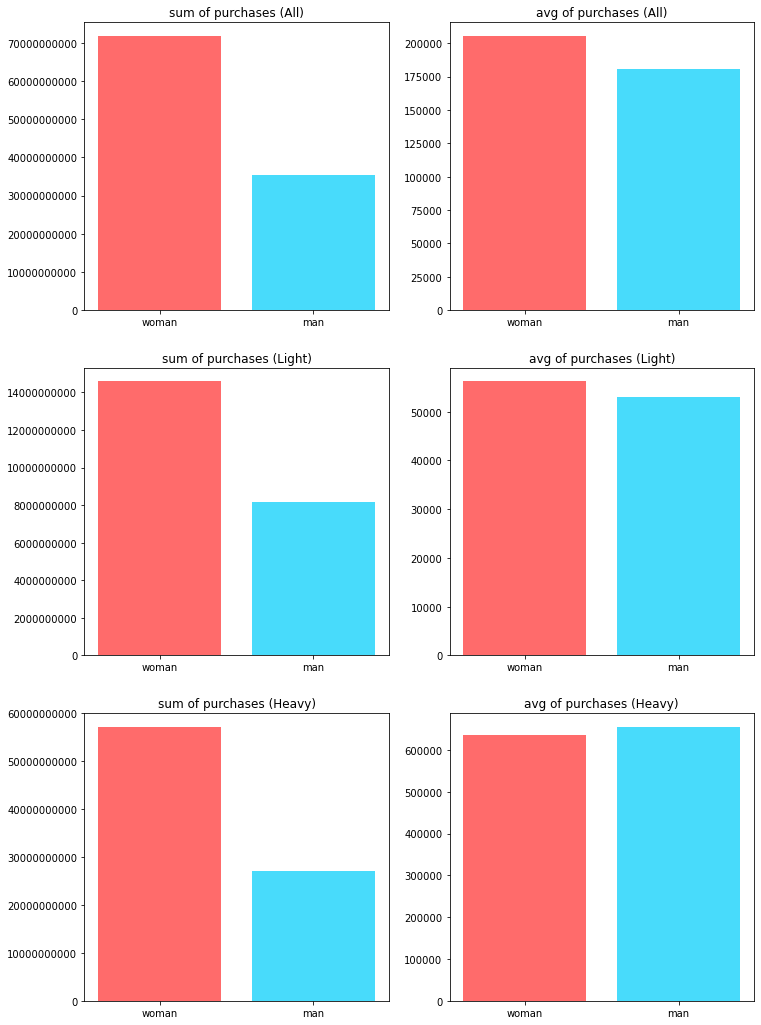

In [64]:
plt.figure(figsize=(12,18),facecolor="white")

genders2(321,322,'All',df2)
genders2(323,324,'Light',df2_l)
genders2(325,326,'Heavy',df2_h)

plt.show()

### push 알림 설정 여부

In [32]:
def push1(sub_loc,title,df2):
    plt.subplot(sub_loc)
    plt.title(title)
    yes = df2[df2['push'].values==1]['push'].count()
    no = df2[df2['push'].values!=1]['push'].count()
    labels = ['No'+'('+str(no)+')','Yes'+'('+str(yes)+')']
    plt.pie(df2['push'].value_counts(),labels=labels,autopct='%.1f%%',colors=['#feca57','#54a0ff'])

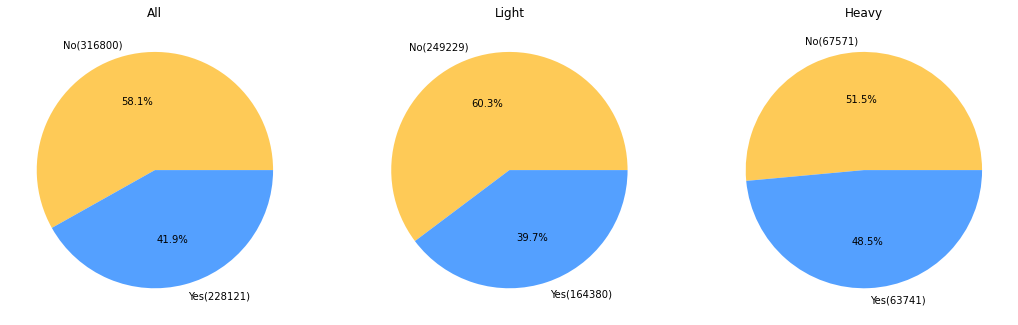

In [33]:
plt.figure(figsize=(18,6),facecolor="white")
push1(131,'All',df2)
push1(132,'Light',df2_l)
push1(133,'Heavy',df2_h)
plt.show()

In [65]:
def push2(sub_loc1,sub_loc2,title,df2):
    plt.subplot(sub_loc1)
    a = df2.groupby('push').sum()['post'].reset_index()
    a.iloc[0,0] = 'no'
    a.iloc[1,0] = 'yes'
    plt.title(f'sum of purchases({title})')
    plt.bar(a['push'],a['post'],color=['#feca57','#54a0ff'])
    current_values = plt.gca().get_yticks()
    plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

    plt.subplot(sub_loc2)
    b = df2.groupby('push').mean()['post'].reset_index()
    b.iloc[0,0] = 'no'
    b.iloc[1,0] = 'yes'
    plt.title(f'avg of purchases({title})')
    plt.bar(b['push'],b['post'],color=['#feca57','#54a0ff'])
    current_values = plt.gca().get_yticks()
    plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_3946/3479317277.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_3946/3479317277.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_3946/3479317277.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_3946/3479317277.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_3946/3479317277.py:

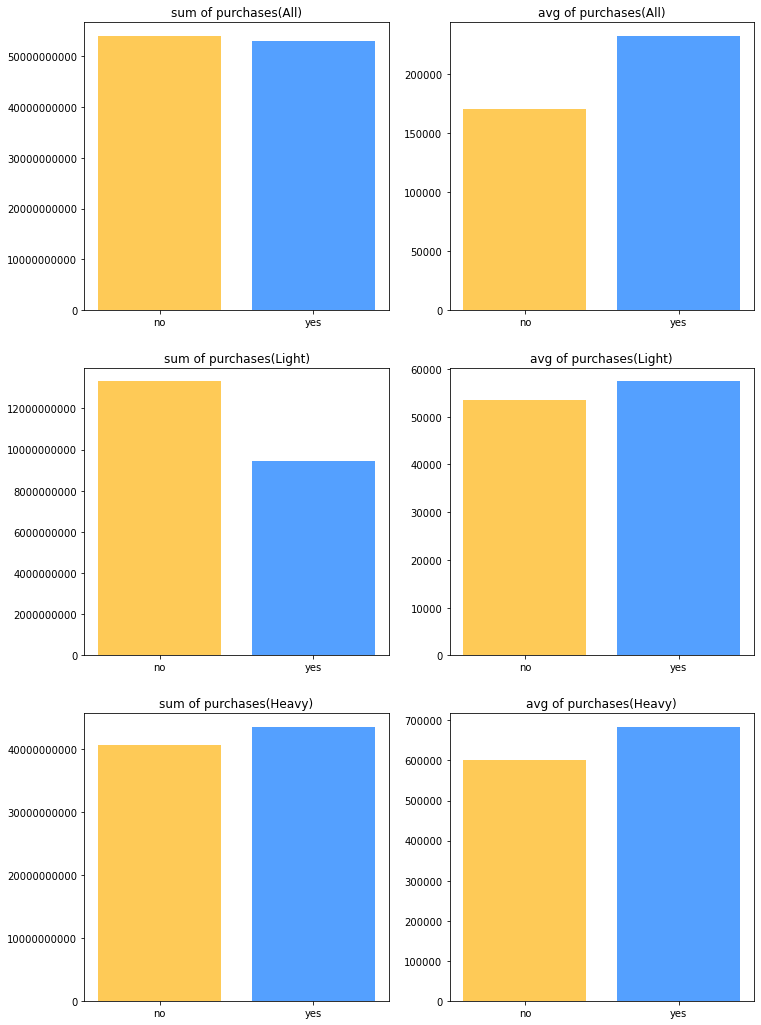

In [66]:
plt.figure(figsize=(12,18),facecolor="white")
push2(321,322,'All',df2)
push2(323,324,'Light',df2_l)
push2(325,326,'Heavy',df2_h)
plt.show()

## 연령대별

/Users/luci031/opt/anaconda3/envs/spark/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/luci031/opt/anaconda3/envs/spark/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/luci031/opt/anaconda3/envs/spark/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a

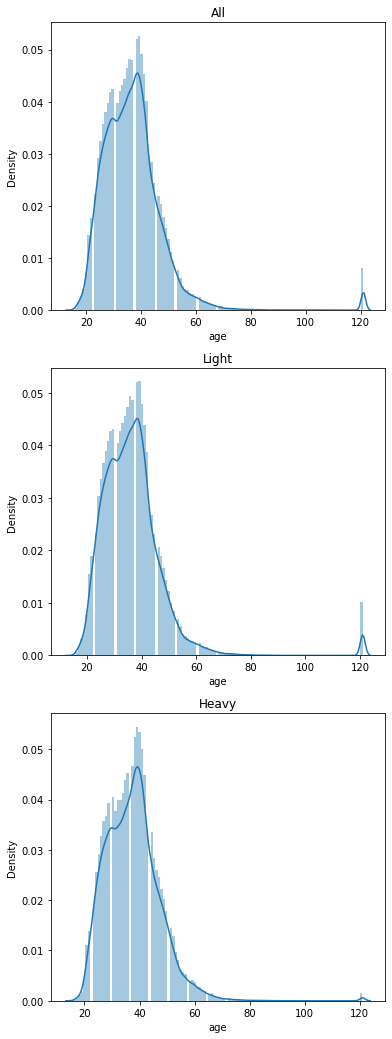

In [42]:
plt.figure(figsize=(6,18),facecolor='white')
plt.subplot(311)
plt.title('All')
sns.distplot(df2['age'],bins=120)
plt.subplot(312)
plt.title('Light')
sns.distplot(df2_l['age'],bins=120)
plt.subplot(313)
plt.title('Heavy')
sns.distplot(df2_h['age'],bins=120)
plt.show()

In [67]:
def age1(sub_loc1,sub_loc2,title,df2):
    plt.subplot(sub_loc1)
    plt.title(f"sum of purchases({title})")
    plt.bar(df2.groupby('age').sum()['post'].index,df2.groupby('age').sum()['post'])
    current_values = plt.gca().get_yticks()
    plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

    plt.subplot(sub_loc2)
    plt.title(f"avg of purchases({title})")
    plt.bar(df2.groupby('age').mean()['post'].index,df2.groupby('age').mean()['post'])
    current_values = plt.gca().get_yticks()
    plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_3946/2815936856.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_3946/2815936856.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_3946/2815936856.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_3946/2815936856.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_3946/2815936856.py:

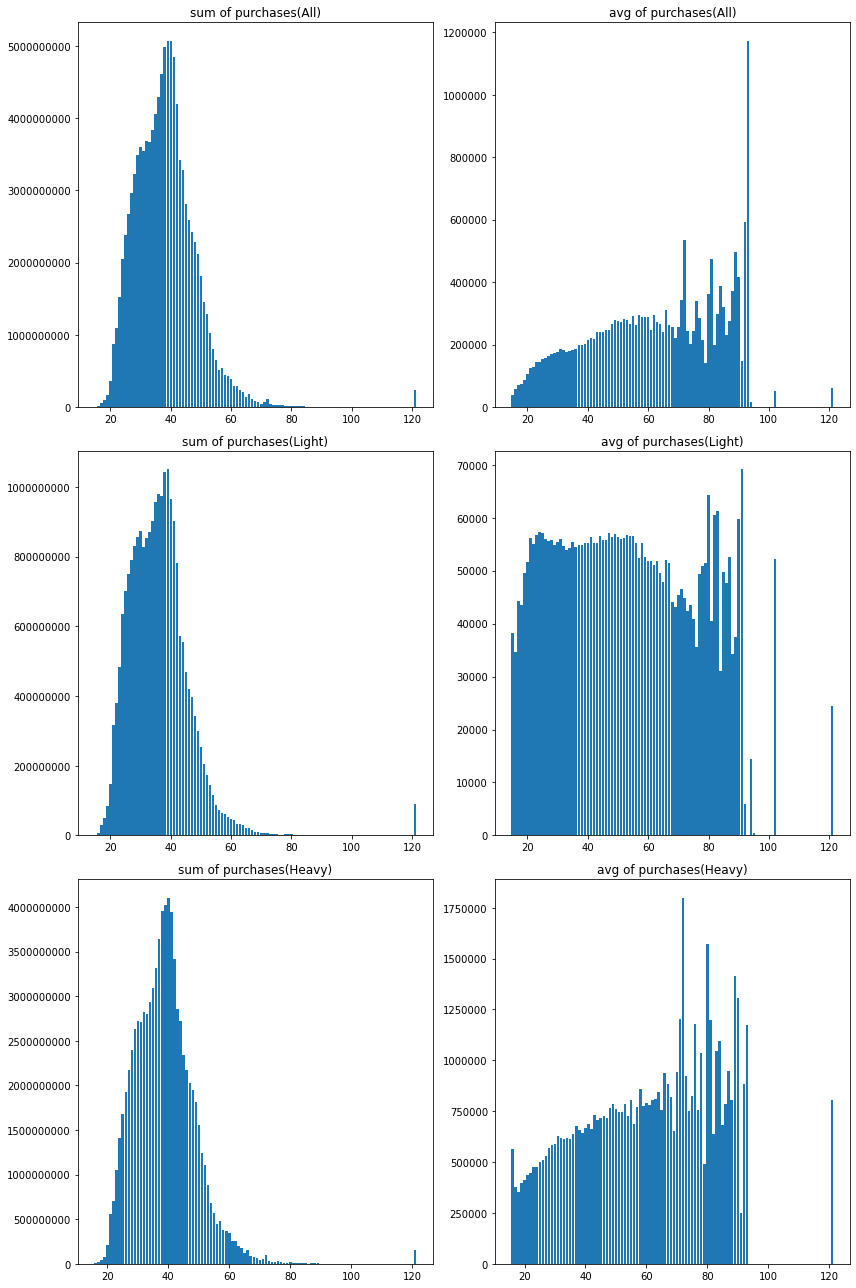

In [68]:
plt.figure(figsize=(12,18),facecolor="white")
age1(321,322,'All',df2)
age1(323,324,'Light',df2_l)
age1(325,326,'Heavy',df2_h)

plt.tight_layout()
plt.show()

In [46]:
#눈에 띄는 지점 기준으로 나누기
def age_des(title,df2):
    print(title)
    print('~29세')
    display(df2[df2['age']<30].describe())
    print('30~39세')
    display(df2[(df2['age']>=30) & (df2['age']<39)].describe())
    print('40~59세')
    display(df2[(df2['age']>=40) & (df2['age']<69)].describe())
    print('60세~')
    display(df2[df2['age']>=60].describe())

In [47]:
age_des('All',df2)
age_des('Light',df2_l)
age_des('Heavy',df2_h)

All
~29세


,id,age,man,push,frgn,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b
count,138105.000,138105.000,138105.000,138105.000,138105.000,138105.000,138105.000,138105.000,138105.000,138105.000,138105.000,138105.000,138105.000,138105.000,138105.000
mean,271724.482,25.419,0.303,0.366,0.007,162478.904,151771.187,1050.427,10707.716,11758.143,0.514,11.468,11.982,1.000,7.867
std,157150.056,2.806,0.460,0.482,0.080,339014.587,324765.201,4164.776,17261.274,19100.424,0.959,12.288,12.041,0.000,15.214
min,2.000,15.000,0.000,0.000,0.000,500.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000
25%,135784.000,24.000,0.000,0.000,0.000,22430.000,19000.000,0.000,2000.000,2300.000,0.000,4.600,5.400,1.000,1.000
50%,271322.000,26.000,0.000,0.000,0.000,60700.000,55200.000,0.000,5000.000,5501.000,0.000,8.300,8.600,1.000,3.000
75%,407641.000,28.000,1.000,1.000,0.000,175550.000,163800.000,714.000,11700.000,12818.000,0.600,13.400,13.700,1.000,8.000
max,544918.000,29.000,1.000,1.000,1.000,25362070.000,24594730.000,851803.000,767340.000,961803.000,5.000,100.000,100.000,1.000,1363.000


30~39세


,id,age,man,push,frgn,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b
count,195566.000,195566.000,195566.000,195566.000,195566.000,195566.000,195566.000,195566.000,195566.000,195566.000,195566.000,195566.000,195566.000,195566.000,195566.000
mean,273047.423,34.194,0.346,0.324,0.008,199607.330,185552.998,1155.339,14054.332,15209.671,0.432,12.575,13.007,1.000,9.484
std,157361.985,2.594,0.476,0.468,0.087,547461.595,527315.196,4479.093,24636.488,26892.533,0.894,12.370,12.181,0.000,20.138
min,1.000,30.000,0.000,0.000,0.000,500.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000
25%,136984.250,32.000,0.000,0.000,0.000,23800.000,19900.000,0.000,2191.000,3000.000,0.000,5.800,6.400,1.000,1.000
50%,273653.500,34.000,0.000,0.000,0.000,65100.000,58140.000,0.000,6010.000,6890.000,0.000,9.300,9.700,1.000,3.000
75%,409541.750,36.000,1.000,1.000,0.000,193800.000,178763.750,574.000,15000.000,16131.750,0.400,15.100,15.300,1.000,10.000
max,544921.000,38.000,1.000,1.000,1.000,110444100.000,108395600.000,248180.000,2048500.000,2198593.000,5.000,100.000,100.000,1.000,2705.000


40~59세


,id,age,man,push,frgn,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b
count,180117.000,180117.000,180117.000,180117.000,180117.000,180117.000,180117.000,180117.000,180117.000,180117.000,180117.000,180117.000,180117.000,180117.000,180117.000
mean,272488.503,45.931,0.414,0.562,0.003,262213.948,243874.074,1578.434,18339.875,19918.308,0.424,12.123,12.547,1.000,13.206
std,157335.900,5.739,0.493,0.496,0.058,665014.281,637014.631,5549.458,32753.278,35602.917,0.862,11.770,11.588,0.000,24.776
min,3.000,40.000,0.000,0.000,0.000,500.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000
25%,136162.000,41.000,0.000,0.000,0.000,26015.000,22292.000,0.000,3000.000,3501.000,0.000,5.800,6.500,1.000,1.000
50%,272334.000,44.000,0.000,1.000,0.000,78130.000,70400.000,0.000,7000.000,7911.000,0.000,9.200,9.500,1.000,4.000
75%,408573.000,49.000,1.000,1.000,0.000,260826.000,240400.000,795.000,19821.000,21203.000,0.500,14.300,14.500,1.000,13.000
max,544920.000,68.000,1.000,1.000,1.000,115005350.000,112273800.000,312593.000,2731550.000,2731550.000,5.000,100.000,100.000,1.000,464.000


60세~


,id,age,man,push,frgn,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b
count,12901.000,12901.000,12901.000,12901.000,12901.000,12901.000,12901.000,12901.000,12901.000,12901.000,12901.000,12901.000,12901.000,12901.000,12901.000
mean,272419.610,82.180,0.385,0.559,0.004,227388.543,211360.053,1147.968,16028.490,17176.458,0.292,19.431,19.724,1.000,10.946
std,157932.362,25.989,0.487,0.497,0.062,695771.826,668423.049,5458.440,32317.717,34741.586,0.765,22.030,21.873,0.000,24.340
min,69.000,60.000,0.000,0.000,0.000,500.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000
25%,135890.000,62.000,0.000,0.000,0.000,14610.000,11040.000,0.000,3000.000,3000.000,0.000,6.600,7.100,1.000,1.000
50%,269704.000,67.000,0.000,1.000,0.000,40600.000,34800.000,0.000,5050.000,5775.000,0.000,11.100,11.100,1.000,2.000
75%,409408.000,121.000,1.000,1.000,0.000,165110.000,150035.000,0.000,14520.000,15537.000,0.000,22.900,23.000,1.000,9.000
max,544842.000,121.000,1.000,1.000,1.000,33798700.000,33027600.000,312593.000,807400.000,808678.000,5.000,100.000,100.000,1.000,385.000


Light
~29세


,id,age,man,push,frgn,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b
count,109232.000,109232.000,109232.000,109232.000,109232.000,109232.000,109232.000,109232.000,109232.000,109232.000,109232.000,109232.000,109232.000,109232.000,109232.000
mean,272044.174,25.343,0.314,0.359,0.005,60878.182,55556.484,337.665,5321.698,5659.363,0.469,12.922,13.391,1.000,3.445
std,157331.035,2.856,0.464,0.480,0.071,54190.533,51127.968,849.998,4966.658,5042.944,0.974,13.364,13.113,0.000,3.744
min,2.000,15.000,0.000,0.000,0.000,500.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000
25%,135904.500,23.000,0.000,0.000,0.000,17900.000,15235.000,0.000,2000.000,2000.000,0.000,5.100,5.800,1.000,1.000
50%,271767.000,26.000,0.000,0.000,0.000,40000.000,35820.000,0.000,4466.000,4724.000,0.000,9.700,10.000,1.000,2.000
75%,408359.250,28.000,1.000,1.000,0.000,91710.000,84001.500,234.000,7000.000,7501.000,0.400,16.000,16.200,1.000,4.000
max,544917.000,29.000,1.000,1.000,1.000,259600.000,199998.000,10195.000,67000.000,74339.000,5.000,100.000,100.000,1.000,46.000


30~39세


,id,age,man,push,frgn,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b
count,151053.000,151053.000,151053.000,151053.000,151053.000,151053.000,151053.000,151053.000,151053.000,151053.000,151053.000,151053.000,151053.000,151053.000,151053.000
mean,273177.590,34.183,0.360,0.308,0.006,61157.052,54825.738,280.168,6331.314,6611.481,0.377,14.328,14.705,1.000,3.731
std,157418.592,2.588,0.480,0.462,0.079,53996.500,50077.207,782.405,6028.382,6114.427,0.893,13.482,13.299,0.000,3.854
min,1.000,30.000,0.000,0.000,0.000,500.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000
25%,137027.000,32.000,0.000,0.000,0.000,18460.000,15700.000,0.000,2000.000,2000.000,0.000,6.700,7.200,1.000,1.000
50%,273908.000,34.000,0.000,0.000,0.000,41400.000,36400.000,0.000,5000.000,5000.000,0.000,11.000,11.100,1.000,2.000
75%,409663.000,36.000,1.000,1.000,0.000,90038.000,81800.000,9.000,8490.000,8990.000,0.000,17.400,17.700,1.000,5.000
max,544913.000,38.000,1.000,1.000,1.000,397100.000,199999.000,12453.000,305000.000,305000.000,5.000,100.000,100.000,1.000,68.000


40~59세


,id,age,man,push,frgn,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b
count,129134.000,129134.000,129134.000,129134.000,129134.000,129134.000,129134.000,129134.000,129134.000,129134.000,129134.000,129134.000,129134.000,129134.000,129134.000
mean,272281.745,45.805,0.436,0.536,0.003,62199.377,55683.605,268.943,6515.772,6784.715,0.345,14.207,14.552,1.000,3.862
std,157459.333,5.712,0.496,0.499,0.054,54721.173,50546.637,783.000,6216.868,6305.165,0.857,13.196,13.030,0.000,4.056
min,3.000,40.000,0.000,0.000,0.000,500.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000
25%,135944.000,41.000,0.000,0.000,0.000,18660.000,15800.000,0.000,2000.000,2000.000,0.000,6.900,7.300,1.000,1.000
50%,271937.500,44.000,0.000,1.000,0.000,41840.000,36900.000,0.000,5000.000,5000.000,0.000,11.100,11.100,1.000,2.000
75%,408552.500,48.000,1.000,1.000,0.000,92340.750,83351.500,0.000,8681.000,9000.000,0.000,17.100,17.300,1.000,5.000
max,544915.000,68.000,1.000,1.000,1.000,268069.000,199990.000,11024.000,108000.000,108075.000,5.000,100.000,100.000,1.000,61.000


60세~


,id,age,man,push,frgn,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b
count,10160.000,10160.000,10160.000,10160.000,10160.000,10160.000,10160.000,10160.000,10160.000,10160.000,10160.000,10160.000,10160.000,10160.000,10160.000
mean,273334.513,85.769,0.379,0.508,0.003,46565.443,40423.969,158.320,6141.474,6299.794,0.215,22.839,23.054,1.000,3.119
std,157768.798,27.127,0.485,0.500,0.058,49184.548,45597.362,628.708,5962.194,6028.256,0.722,23.631,23.502,0.000,3.821
min,82.000,60.000,0.000,0.000,0.000,500.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000
25%,137576.500,63.000,0.000,0.000,0.000,11910.000,8900.000,0.000,2000.000,2000.000,0.000,8.300,8.500,1.000,1.000
50%,270968.000,69.000,0.000,1.000,0.000,26250.000,21600.000,0.000,5000.000,5000.000,0.000,13.500,13.600,1.000,1.000
75%,410285.250,121.000,1.000,1.000,0.000,62962.500,55237.000,0.000,7720.500,8000.000,0.000,29.100,29.200,1.000,4.000
max,544688.000,121.000,1.000,1.000,1.000,242440.000,199863.000,9387.000,108000.000,108075.000,5.000,100.000,100.000,1.000,58.000


Heavy
~29세


,id,age,man,push,frgn,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b
count,28873.000,28873.000,28873.000,28873.000,28873.000,28873.000,28873.000,28873.000,28873.000,28873.000,28873.000,28873.000,28873.000,28873.000,28873.000
mean,270515.027,25.702,0.262,0.393,0.012,546853.578,515769.541,3746.942,31084.037,34830.979,0.686,5.966,6.652,1.000,24.599
std,156460.289,2.588,0.440,0.488,0.109,593159.348,571923.064,8428.612,28406.212,31237.337,0.880,2.877,2.661,0.000,26.460
min,11.000,16.000,0.000,0.000,0.000,200280.000,200000.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000
25%,135288.000,24.000,0.000,0.000,0.000,282000.000,268950.000,0.000,14790.000,17350.000,0.000,3.800,4.800,1.000,11.000
50%,269765.000,26.000,0.000,0.000,0.000,394023.000,368891.000,1662.000,24250.000,26748.000,0.400,6.000,6.600,1.000,19.000
75%,405153.000,28.000,1.000,1.000,0.000,610992.000,574086.000,4564.000,38720.000,42270.000,1.000,7.800,8.200,1.000,31.000
max,544918.000,29.000,1.000,1.000,1.000,25362070.000,24594730.000,851803.000,767340.000,961803.000,5.000,30.600,33.800,1.000,1363.000


30~39세


,id,age,man,push,frgn,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b
count,44513.000,44513.000,44513.000,44513.000,44513.000,44513.000,44513.000,44513.000,44513.000,44513.000,44513.000,44513.000,44513.000,44513.000,44513.000
mean,272605.707,34.231,0.297,0.381,0.013,669432.546,629170.475,4125.196,40262.071,44387.267,0.619,6.625,7.244,1.000,29.008
std,157170.701,2.615,0.457,0.486,0.112,1010505.236,978962.128,8639.878,40670.518,44139.989,0.870,3.107,2.942,0.000,35.182
min,4.000,30.000,0.000,0.000,0.000,200050.000,200000.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000
25%,136867.000,32.000,0.000,0.000,0.000,297580.000,276109.000,0.000,18551.000,20910.000,0.000,4.400,5.300,1.000,12.000
50%,272821.000,34.000,0.000,0.000,0.000,439638.000,409148.000,1368.000,30000.000,32400.000,0.300,6.500,7.100,1.000,21.000
75%,408912.000,37.000,1.000,1.000,0.000,756832.000,708532.000,4602.000,49366.000,53241.000,0.900,8.500,8.900,1.000,36.000
max,544921.000,38.000,1.000,1.000,1.000,110444100.000,108395600.000,248180.000,2048500.000,2198593.000,5.000,43.300,48.100,1.000,2705.000


40~59세


,id,age,man,push,frgn,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b
count,50983.000,50983.000,50983.000,50983.000,50983.000,50983.000,50983.000,50983.000,50983.000,50983.000,50983.000,50983.000,50983.000,50983.000,50983.000
mean,273012.197,46.249,0.359,0.628,0.005,768827.558,720538.609,4895.220,48288.949,53184.169,0.622,6.846,7.469,1.000,36.872
std,157023.148,5.795,0.480,0.483,0.068,1094001.570,1053674.572,9586.676,49407.106,53235.212,0.841,3.096,2.895,0.000,36.684
min,28.000,40.000,0.000,0.000,0.000,200820.000,200000.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000
25%,136788.000,42.000,0.000,0.000,0.000,320966.000,296974.000,0.000,21000.000,23544.500,0.000,4.700,5.600,1.000,15.000
50%,273494.000,45.000,0.000,1.000,0.000,505062.000,468678.000,1707.000,34917.000,37901.000,0.300,6.700,7.300,1.000,26.000
75%,408616.500,49.000,1.000,1.000,0.000,904995.000,843955.500,5606.000,59519.500,64528.500,0.900,8.700,9.100,1.000,46.000
max,544920.000,68.000,1.000,1.000,1.000,115005350.000,112273800.000,312593.000,2731550.000,2731550.000,5.000,33.800,35.200,1.000,464.000


60세~


,id,age,man,push,frgn,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b
count,2741.000,2741.000,2741.000,2741.000,2741.000,2741.000,2741.000,2741.000,2741.000,2741.000,2741.000,2741.000,2741.000,2741.000,2741.000
mean,269028.359,68.878,0.411,0.745,0.006,897641.262,844964.803,4816.273,52676.459,57492.731,0.580,6.799,7.378,1.000,39.955
std,158519.965,15.060,0.492,0.436,0.076,1303662.613,1259302.107,11032.458,55492.300,59017.700,0.848,3.426,3.301,0.000,40.819
min,69.000,60.000,0.000,0.000,0.000,205904.000,200100.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000
25%,130257.000,61.000,0.000,0.000,0.000,335600.000,309338.000,0.000,22490.000,24873.000,0.000,4.300,5.200,1.000,14.000
50%,263495.000,64.000,0.000,1.000,0.000,547505.000,508000.000,1412.000,37000.000,40000.000,0.300,6.700,7.300,1.000,28.000
75%,403995.000,68.000,1.000,1.000,0.000,989569.000,938400.000,5343.000,63591.000,68434.000,0.800,8.800,9.100,1.000,52.000
max,544842.000,121.000,1.000,1.000,1.000,33798700.000,33027600.000,312593.000,807400.000,808678.000,5.000,29.100,33.200,1.000,385.000


## 구매 횟수별 (once and more)

In [49]:
def cnt_b1(sub_loc,title,df2):
    plt.subplot(sub_loc)
    plt.title(title)
    labels = df2['cnt_b'].value_counts().index.to_list()
    plt.pie(df2['cnt_b'].value_counts(),labels=labels,autopct='%.1f%%')

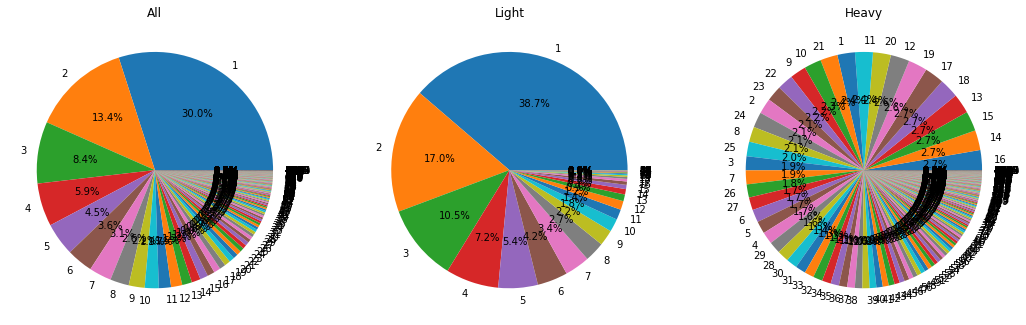

In [50]:
plt.figure(figsize=(18,6),facecolor="white")
cnt_b1(131,'All',df2)
cnt_b1(132,'Light',df2_l)
cnt_b1(133,'Heavy',df2_h)
plt.show()

In [69]:
def cnt_b2(sub_loc1,sub_loc2,title,df2):
    plt.subplot(sub_loc1)
    a = df2.groupby('push').sum()['post'].reset_index()
    a.iloc[0,0] = 'no'
    a.iloc[1,0] = 'yes'
    plt.title(f'sum of purchases({title})')
    plt.bar(df2.groupby('cnt_b').sum()['post'].index,df2.groupby('cnt_b').sum()['post'])
    current_values = plt.gca().get_yticks()
    plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

    plt.subplot(sub_loc2)
    b = df2.groupby('push').mean()['post'].reset_index()
    b.iloc[0,0] = 'no'
    b.iloc[1,0] = 'yes'
    plt.title(f'avg of purchases({title})')
    plt.bar(df2.groupby('cnt_b').mean()['post'].index,df2.groupby('cnt_b').mean()['post'])
    current_values = plt.gca().get_yticks()
    plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_3946/3646250469.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_3946/3646250469.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_3946/3646250469.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_3946/3646250469.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_3946/3646250469.py:

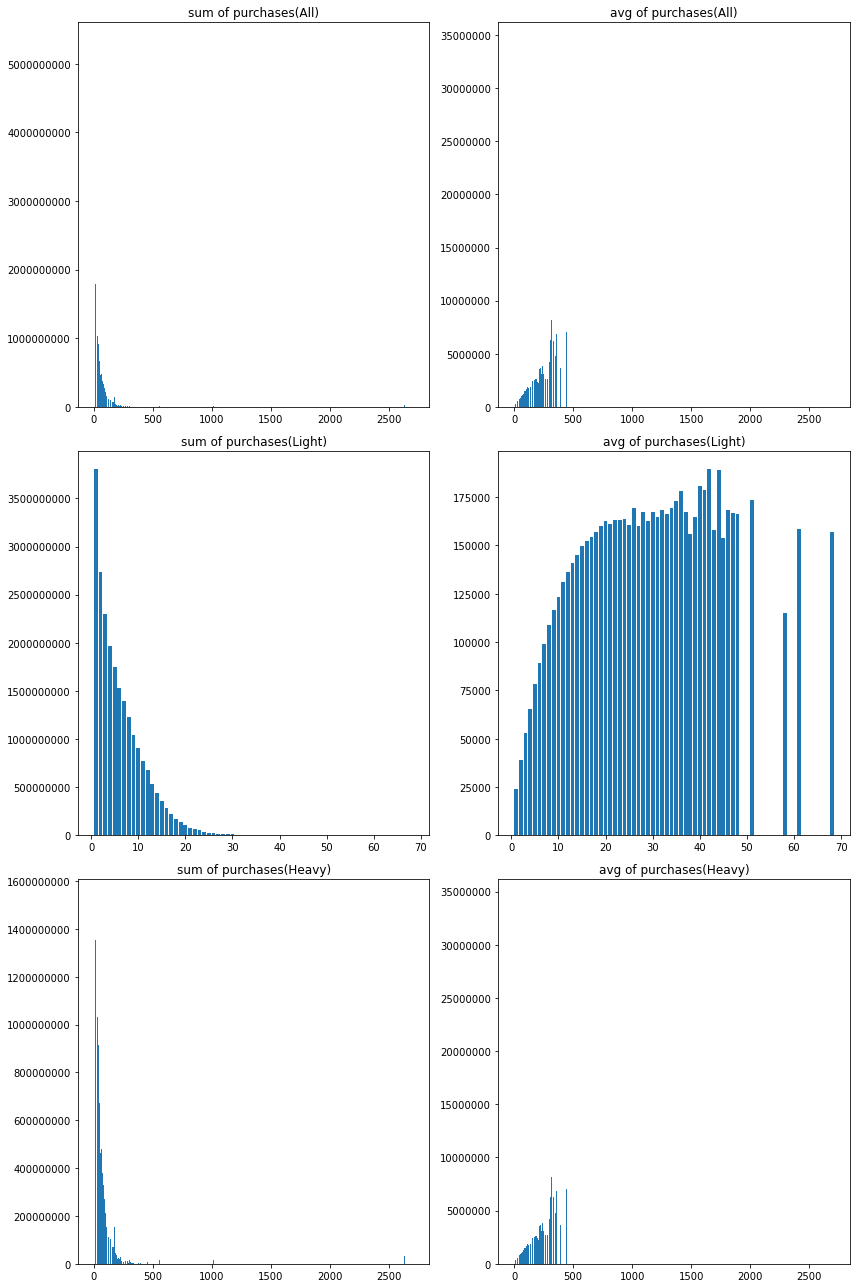

In [70]:
plt.figure(figsize=(12,18),facecolor="white")
cnt_b2(321,322,'All',df2)
cnt_b2(323,324,'Light',df2_l)
cnt_b2(325,326,'Heavy',df2_h)

plt.tight_layout()
plt.show()

In [55]:
#눈에 띄는 지점 기준으로 나누기
def cnt_b3(title,df2):
    print(title)
    print('1회')
    display(df2[df2['cnt_b']<2].describe())
    print('2~3회')
    display(df2[(df2['cnt_b']>=2) & (df2['cnt_b']<4)].describe())
    print('4~10회')
    display(df2[(df2['cnt_b']>=4) & (df2['cnt_b']<11)].describe())
    print('11회~')
    display(df2[df2['cnt_b']>=11].describe())

In [56]:
cnt_b3('All',df2)
cnt_b3('Light',df2_l)
cnt_b3('Heavy',df2_h)

All
1회


,id,age,man,push,frgn,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b
count,163227.000,163227.000,163227.000,163227.000,163227.000,163227.000,163227.000,163227.000,163227.000,163227.000,163227.000,163227.000,163227.000,163227.000,163227.000
mean,272553.842,36.884,0.400,0.374,0.004,35677.349,32686.630,102.533,2990.719,3093.252,0.240,17.305,17.545,1.000,1.000
std,157021.312,14.544,0.490,0.484,0.064,82129.937,80606.849,1042.672,2952.574,3041.888,0.871,18.598,18.443,0.000,0.000
min,3.000,15.000,0.000,0.000,0.000,500.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000
25%,136992.000,28.000,0.000,0.000,0.000,10560.000,7900.000,0.000,1501.000,1501.000,0.000,5.100,5.300,1.000,1.000
50%,272484.000,35.000,0.000,0.000,0.000,16500.000,13900.000,0.000,2000.000,2000.000,0.000,11.200,11.300,1.000,1.000
75%,408381.000,41.000,1.000,1.000,0.000,29800.000,27300.000,0.000,5000.000,5000.000,0.000,22.700,22.800,1.000,1.000
max,544913.000,121.000,1.000,1.000,1.000,1990950.000,1985950.000,94772.000,58000.000,94772.000,5.000,100.000,100.000,1.000,1.000


2~3회


,id,age,man,push,frgn,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b
count,119180.000,119180.000,119180.000,119180.000,119180.000,119180.000,119180.000,119180.000,119180.000,119180.000,119180.000,119180.000,119180.000,119180.000,119180.000
mean,272735.881,36.328,0.392,0.393,0.005,70849.770,65590.136,258.768,5259.634,5518.401,0.402,12.497,12.899,1.000,2.386
std,157321.855,10.735,0.488,0.488,0.067,147277.241,143732.805,1296.826,5303.438,5342.903,0.921,10.218,10.014,0.000,0.487
min,1.000,15.000,0.000,0.000,0.000,1000.000,500.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2.000
25%,136358.000,29.000,0.000,0.000,0.000,25470.000,21400.000,0.000,2491.000,3000.000,0.000,5.700,6.300,1.000,2.000
50%,272672.500,36.000,0.000,0.000,0.000,38750.000,34340.000,0.000,4000.000,4501.000,0.000,10.200,10.500,1.000,2.000
75%,408999.000,41.000,1.000,1.000,0.000,64920.000,59700.000,0.000,6800.000,7000.000,0.000,16.500,16.800,1.000,3.000
max,544917.000,121.000,1.000,1.000,1.000,2876400.000,2815200.000,92856.000,508000.000,508000.000,5.000,92.100,92.100,1.000,3.000


4~10회


,id,age,man,push,frgn,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b
count,129180.000,129180.000,129180.000,129180.000,129180.000,129180.000,129180.000,129180.000,129180.000,129180.000,129180.000,129180.000,129180.000,129180.000,129180.000
mean,272613.534,36.395,0.360,0.416,0.005,149083.965,138359.556,703.493,10724.410,11427.903,0.530,10.111,10.641,1.000,6.257
std,157740.499,9.719,0.480,0.493,0.073,251964.142,245267.457,2037.848,8862.680,8847.334,0.915,6.967,6.728,0.000,1.950
min,4.000,15.000,0.000,0.000,0.000,4639.000,4235.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,4.000
25%,135707.500,30.000,0.000,0.000,0.000,65512.250,57580.000,0.000,6000.000,6850.750,0.000,5.600,6.300,1.000,5.000
50%,272833.500,36.000,0.000,0.000,0.000,100080.000,90699.000,0.000,9190.000,9954.500,0.000,8.700,9.100,1.000,6.000
75%,409635.750,41.000,1.000,1.000,0.000,156542.500,145300.000,738.000,13180.250,13850.000,0.700,12.700,12.900,1.000,8.000
max,544921.000,121.000,1.000,1.000,1.000,9492800.000,9158600.000,99651.000,334200.000,335020.000,5.000,68.800,68.800,1.000,10.000


11회~


,id,age,man,push,frgn,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b
count,133334.000,133334.000,133334.000,133334.000,133334.000,133334.000,133334.000,133334.000,133334.000,133334.000,133334.000,133334.000,133334.000,133334.000,133334.000
mean,271953.860,37.654,0.277,0.498,0.009,611328.260,570129.613,4135.574,41198.647,45334.222,0.656,8.071,8.727,1.000,32.759
std,157216.178,9.673,0.448,0.500,0.096,963320.182,928930.276,8690.822,42167.615,45763.250,0.833,4.154,3.934,0.000,32.875
min,23.000,16.000,0.000,0.000,0.000,19761.000,13922.000,0.000,0.000,746.000,0.000,0.000,0.400,1.000,11.000
25%,135671.750,31.000,0.000,0.000,0.000,239080.000,218289.250,117.000,18750.000,20771.000,0.000,5.500,6.400,1.000,15.000
50%,271832.000,37.000,0.000,0.000,0.000,397057.000,367579.500,1500.000,29506.500,32037.000,0.400,7.500,8.000,1.000,22.000
75%,407876.250,43.000,1.000,1.000,0.000,706145.500,657878.750,4554.000,49527.000,53869.750,0.900,9.700,10.100,1.000,38.000
max,544919.000,121.000,1.000,1.000,1.000,115005350.000,112273800.000,851803.000,2731550.000,2731550.000,5.000,52.600,52.600,1.000,2705.000


Light
1회


,id,age,man,push,frgn,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b
count,160066.000,160066.000,160066.000,160066.000,160066.000,160066.000,160066.000,160066.000,160066.000,160066.000,160066.000,160066.000,160066.000,160066.000,160066.000
mean,272546.128,36.883,0.395,0.375,0.004,26590.095,23765.786,72.233,2824.309,2896.542,0.239,17.599,17.838,1.000,1.000
std,157041.459,14.547,0.489,0.484,0.064,30242.352,29519.347,404.642,2385.367,2345.270,0.866,18.661,18.504,0.000,0.000
min,3.000,15.000,0.000,0.000,0.000,500.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000
25%,136953.750,28.000,0.000,0.000,0.000,10400.000,7900.000,0.000,1501.000,1501.000,0.000,5.600,5.800,1.000,1.000
50%,272440.500,35.000,0.000,0.000,0.000,15900.000,13800.000,0.000,2000.000,2000.000,0.000,11.600,11.800,1.000,1.000
75%,408451.250,41.000,1.000,1.000,0.000,28627.500,25900.000,0.000,5000.000,5000.000,0.000,23.300,23.300,1.000,1.000
max,544913.000,121.000,1.000,1.000,1.000,210000.000,199990.000,9943.000,40000.000,40000.000,5.000,100.000,100.000,1.000,1.000


2~3회


,id,age,man,push,frgn,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b
count,113884.000,113884.000,113884.000,113884.000,113884.000,113884.000,113884.000,113884.000,113884.000,113884.000,113884.000,113884.000,113884.000,113884.000,113884.000
mean,272713.667,36.373,0.380,0.397,0.005,48916.764,44155.450,199.913,4761.314,4961.228,0.403,12.930,13.334,1.000,2.382
std,157345.766,10.710,0.485,0.489,0.068,36438.537,35342.849,597.785,3251.590,3160.792,0.916,10.239,10.026,0.000,0.486
min,1.000,15.000,0.000,0.000,0.000,1000.000,500.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2.000
25%,136329.250,29.000,0.000,0.000,0.000,24800.000,20800.000,0.000,2291.000,2900.000,0.000,6.300,6.800,1.000,2.000
50%,272617.000,36.000,0.000,0.000,0.000,37450.000,32950.000,0.000,4000.000,4300.000,0.000,10.600,10.900,1.000,2.000
75%,409036.000,41.000,1.000,1.000,0.000,59460.000,54550.000,0.000,6470.000,6506.000,0.000,16.900,17.000,1.000,3.000
max,544917.000,121.000,1.000,1.000,1.000,397100.000,199998.000,10040.000,305000.000,305000.000,5.000,92.100,92.100,1.000,3.000


4~10회


,id,age,man,push,frgn,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b
count,111293.000,111293.000,111293.000,111293.000,111293.000,111293.000,111293.000,111293.000,111293.000,111293.000,111293.000,111293.000,111293.000,111293.000,111293.000
mean,272635.571,36.447,0.345,0.418,0.005,97522.580,88278.613,528.340,9243.967,9772.308,0.534,10.934,11.468,1.000,6.097
std,157789.376,9.760,0.475,0.493,0.072,45679.456,43958.997,1010.638,5031.719,4815.661,0.909,7.098,6.837,0.000,1.893
min,5.000,15.000,0.000,0.000,0.000,4639.000,4235.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,4.000
25%,135664.000,30.000,0.000,0.000,0.000,61360.000,53400.000,0.000,6000.000,6355.000,0.000,6.500,7.200,1.000,4.000
50%,272993.000,36.000,0.000,0.000,0.000,89600.000,80500.000,0.000,8768.000,9090.000,0.000,9.500,9.900,1.000,6.000
75%,409722.000,41.000,1.000,1.000,0.000,127730.000,117400.000,664.000,12000.000,12390.000,0.800,13.500,13.800,1.000,7.000
max,544907.000,121.000,1.000,1.000,1.000,258900.000,199999.000,10200.000,87000.000,87000.000,5.000,68.800,68.800,1.000,10.000


11회~


,id,age,man,push,frgn,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b
count,28366.000,28366.000,28366.000,28366.000,28366.000,28366.000,28366.000,28366.000,28366.000,28366.000,28366.000,28366.000,28366.000,28366.000,28366.000
mean,271165.012,36.740,0.324,0.444,0.006,162188.568,144177.670,924.733,18010.898,18935.631,0.578,11.488,12.065,1.000,14.585
std,158298.593,10.004,0.468,0.497,0.079,38065.562,36406.354,1410.783,8749.279,8451.254,0.861,5.875,5.670,0.000,4.057
min,23.000,16.000,0.000,0.000,0.000,19761.000,13922.000,0.000,0.000,746.000,0.000,0.000,0.400,1.000,11.000
25%,133433.000,30.000,0.000,0.000,0.000,135211.500,118602.000,0.000,12150.000,13299.250,0.000,7.800,8.400,1.000,12.000
50%,270650.000,36.000,0.000,0.000,0.000,165820.000,148250.000,346.000,17000.000,17648.500,0.200,10.500,10.800,1.000,13.000
75%,408720.500,42.000,1.000,1.000,0.000,193052.250,174468.250,1296.000,22156.750,22759.000,0.800,13.800,14.200,1.000,16.000
max,544911.000,121.000,1.000,1.000,1.000,282299.000,199999.000,12453.000,114956.000,124642.000,5.000,52.600,52.600,1.000,68.000


Heavy
1회


,id,age,man,push,frgn,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b
count,3161.000,3161.000,3161.000,3161.000,3161.000,3161.000,3161.000,3161.000,3161.000,3161.000,3161.000,3161.000,3161.000,3161.000,3161.000
mean,272944.499,36.909,0.638,0.311,0.004,495835.630,484418.306,1636.898,11417.324,13054.223,0.337,2.416,2.753,1.000,1.000
std,156021.869,14.420,0.481,0.463,0.062,293425.482,288656.334,6742.471,9468.472,9906.341,1.070,1.514,1.352,0.000,0.000
min,27.000,18.000,0.000,0.000,0.000,200540.000,200099.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000
25%,140462.000,29.000,0.000,0.000,0.000,282000.000,273000.000,0.000,5000.000,8000.000,0.000,1.400,2.100,1.000,1.000
50%,275237.000,34.000,1.000,0.000,0.000,374000.000,363600.000,0.000,10000.000,10000.000,0.000,3.200,3.200,1.000,1.000
75%,405952.000,41.000,1.000,1.000,0.000,674000.000,654000.000,0.000,15000.000,15750.000,0.000,3.200,3.200,1.000,1.000
max,544720.000,121.000,1.000,1.000,1.000,1990950.000,1985950.000,94772.000,58000.000,94772.000,5.000,13.300,13.300,1.000,1.000


2~3회


,id,age,man,push,frgn,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b
count,5296.000,5296.000,5296.000,5296.000,5296.000,5296.000,5296.000,5296.000,5296.000,5296.000,5296.000,5296.000,5296.000,5296.000,5296.000
mean,273213.564,35.355,0.656,0.313,0.003,542492.230,526516.844,1524.355,15975.386,17499.740,0.379,3.176,3.556,1.000,2.475
std,156820.850,11.216,0.475,0.464,0.051,476251.956,464490.354,5337.654,16896.118,16655.071,1.009,2.069,1.871,0.000,0.499
min,124.000,17.000,0.000,0.000,0.000,200400.000,200000.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2.000
25%,137259.250,28.000,0.000,0.000,0.000,265475.000,253115.000,0.000,7000.000,8786.000,0.000,2.100,2.700,1.000,2.000
50%,273812.000,34.000,1.000,0.000,0.000,332140.000,322000.000,0.000,11501.000,12500.000,0.000,3.200,3.200,1.000,2.000
75%,408082.750,40.000,1.000,1.000,0.000,594800.000,579817.500,0.000,20000.000,20400.000,0.000,3.800,4.000,1.000,3.000
max,544554.000,121.000,1.000,1.000,1.000,2876400.000,2815200.000,92856.000,508000.000,508000.000,5.000,37.400,37.400,1.000,3.000


4~10회


,id,age,man,push,frgn,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b
count,17887.000,17887.000,17887.000,17887.000,17887.000,17887.000,17887.000,17887.000,17887.000,17887.000,17887.000,17887.000,17887.000,17887.000,17887.000
mean,272476.424,36.067,0.454,0.407,0.006,469899.152,449963.424,1793.296,19935.728,21729.024,0.507,4.988,5.496,1.000,7.252
std,157440.382,9.456,0.498,0.491,0.075,571019.708,556539.433,4717.959,17642.756,17258.584,0.952,2.568,2.302,0.000,2.001
min,4.000,17.000,0.000,0.000,0.000,200050.000,200000.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,4.000
25%,135929.000,29.000,0.000,0.000,0.000,244120.000,229665.500,0.000,10986.000,13000.000,0.000,3.200,3.800,1.000,6.000
50%,272007.000,36.000,0.000,0.000,0.000,296941.000,281000.000,0.000,16430.000,17749.000,0.000,4.700,5.200,1.000,7.000
75%,408928.500,41.000,1.000,1.000,0.000,427122.500,408575.000,1737.000,23018.500,24144.500,0.600,6.600,6.900,1.000,9.000
max,544921.000,121.000,1.000,1.000,1.000,9492800.000,9158600.000,99651.000,334200.000,335020.000,5.000,43.300,48.100,1.000,10.000


11회~


,id,age,man,push,frgn,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b
count,104968.000,104968.000,104968.000,104968.000,104968.000,104968.000,104968.000,104968.000,104968.000,104968.000,104968.000,104968.000,104968.000,104968.000,104968.000
mean,272167.034,37.901,0.264,0.513,0.010,732701.407,685236.624,5003.255,47464.783,52468.038,0.677,7.148,7.825,1.000,37.671
std,156922.467,9.567,0.441,0.500,0.100,1053150.036,1016594.261,9584.613,45314.116,49007.238,0.823,2.931,2.674,0.000,35.426
min,28.000,16.000,0.000,0.000,0.000,200490.000,200000.000,0.000,0.000,2451.000,0.000,0.000,0.500,1.000,11.000
25%,136282.750,31.000,0.000,0.000,0.000,330653.000,305061.750,354.000,23102.000,25832.750,0.100,5.200,6.100,1.000,18.000
50%,272176.500,38.000,0.000,1.000,0.000,496238.500,460234.000,2146.000,35384.000,38653.000,0.400,7.000,7.600,1.000,27.000
75%,407544.750,43.000,1.000,1.000,0.000,830322.750,774243.250,5752.000,57200.250,62158.250,0.900,8.800,9.200,1.000,45.000
max,544919.000,121.000,1.000,1.000,1.000,115005350.000,112273800.000,851803.000,2731550.000,2731550.000,5.000,38.600,41.600,1.000,2705.000


## 구매 금액별 (heavy and light)

In [14]:
df2['pre'].describe()

count      544921.000
mean       211107.465
std        550003.100
min           500.000
25%         23800.000
50%         67300.000
75%        206356.000
max     115005350.000
Name: pre, dtype: float64

/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_2956/2437683103.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values1])
/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_2956/2437683103.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:.0f}'.format(x) for x in current_values2])


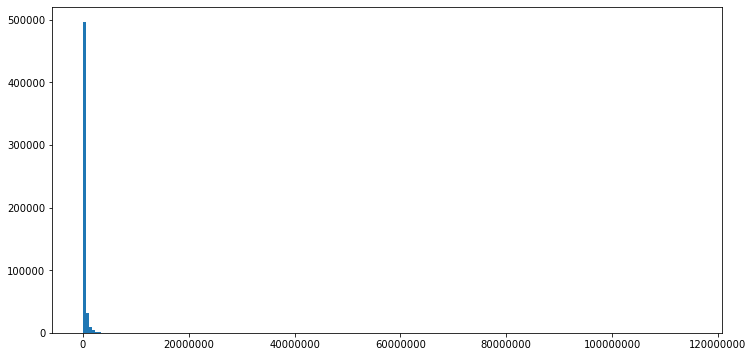

In [15]:
plt.figure(figsize=(12,6),facecolor="white")
plt.hist(df2['pre'],bins=200)
current_values1 = plt.gca().get_yticks()
current_values2 = plt.gca().get_xticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values1])
plt.gca().set_xticklabels(['{:.0f}'.format(x) for x in current_values2])
plt.show()

/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_2956/3244094015.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values1])
/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_2956/3244094015.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:.0f}'.format(x) for x in current_values2])


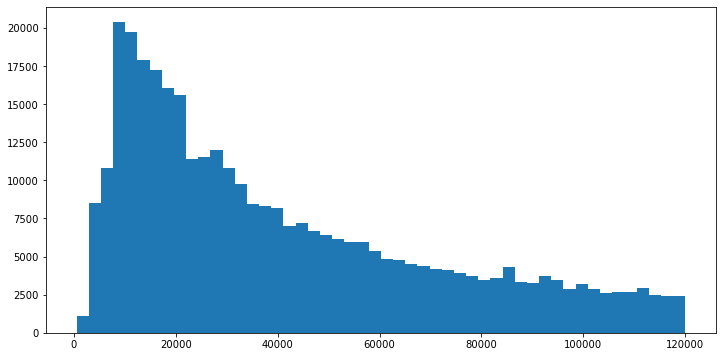

In [16]:
# 12만원 이하 금액들 분포 살피기
plt.figure(figsize=(12,6),facecolor="white")
plt.hist(df2[df2['pre']<=120000]['pre'],bins=50)
current_values1 = plt.gca().get_yticks()
current_values2 = plt.gca().get_xticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values1])
plt.gca().set_xticklabels(['{:.0f}'.format(x) for x in current_values2])
plt.show()

In [18]:
#눈에 띄는 지점 기준으로 나누기
print('~2만원')
display(df2[df2['post']<20000].describe())
print('2~8만원')
display(df2[(df2['pre']>=20000) & (df2['pre']<80000)].describe())
print('8~20만원')
display(df2[(df2['pre']>=80000) & (df2['pre']<200000)].describe())
print('20만원~')
display(df2[df2['post']>=200000].describe())

~2만원


,id,age,man,push,frgn,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b
count,135603.000,135603.000,135603.000,135603.000,135603.000,135603.000,135603.000,135603.000,135603.000,135603.000,135603.000,135603.000,135603.000,135603.000,135603.000
mean,272305.827,37.341,0.402,0.372,0.004,13731.900,10831.171,28.656,2900.729,2929.385,0.223,22.800,23.023,1.000,1.272
std,157302.277,14.552,0.490,0.483,0.062,5668.272,5152.521,108.777,2295.298,2279.868,0.800,19.489,19.342,0.000,0.611
min,1.000,15.000,0.000,0.000,0.000,500.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000
25%,136338.000,29.000,0.000,0.000,0.000,9800.000,7120.000,0.000,1501.000,1501.000,0.000,11.100,11.100,1.000,1.000
50%,272101.000,36.000,0.000,0.000,0.000,13400.000,10500.000,0.000,2000.000,2000.000,0.000,18.300,18.300,1.000,1.000
75%,408686.500,41.000,1.000,1.000,0.000,17850.000,15120.000,0.000,4700.000,4726.500,0.000,31.200,31.200,1.000,1.000
max,544913.000,121.000,1.000,1.000,1.000,41900.000,19999.000,1710.000,23000.000,23000.000,5.000,100.000,100.000,1.000,11.000


2~8만원


,id,age,man,push,frgn,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b
count,177456.000,177456.000,177456.000,177456.000,177456.000,177456.000,177456.000,177456.000,177456.000,177456.000,177456.000,177456.000,177456.000,177456.000,177456.000
mean,272531.428,36.449,0.362,0.399,0.005,43496.798,38509.280,181.939,4987.518,5169.457,0.396,12.168,12.564,1.000,2.764
std,157405.773,11.393,0.481,0.490,0.070,16758.689,15873.865,440.958,3440.716,3371.465,0.913,8.168,7.928,0.000,1.834
min,1.000,15.000,0.000,0.000,0.000,20000.000,7400.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000
25%,136368.000,29.000,0.000,0.000,0.000,28840.000,25000.000,0.000,2000.000,2620.000,0.000,6.700,7.100,1.000,1.000
50%,272419.500,36.000,0.000,0.000,0.000,40300.000,35600.000,0.000,5000.000,5000.000,0.000,10.700,11.000,1.000,2.000
75%,409020.750,41.000,1.000,1.000,0.000,56400.000,50540.000,0.000,6700.000,6870.000,0.000,16.400,16.600,1.000,4.000
max,544917.000,121.000,1.000,1.000,1.000,79995.000,79930.000,3998.000,36000.000,36000.000,5.000,68.800,68.800,1.000,25.000


8~20만원


,id,age,man,push,frgn,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b
count,111597.000,111597.000,111597.000,111597.000,111597.000,111597.000,111597.000,111597.000,111597.000,111597.000,111597.000,111597.000,111597.000,111597.000,111597.000
mean,272669.214,36.058,0.361,0.418,0.005,129308.907,118649.690,689.555,10659.217,11348.773,0.528,8.372,8.900,1.000,7.067
std,157561.266,9.987,0.480,0.493,0.072,34106.531,32553.120,1266.648,6685.537,6470.069,0.939,4.981,4.749,0.000,4.583
min,8.000,15.000,0.000,0.000,0.000,80000.000,42500.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000
25%,135691.000,29.000,0.000,0.000,0.000,99000.000,90500.000,0.000,6000.000,6961.000,0.000,4.900,5.700,1.000,4.000
50%,272908.000,36.000,0.000,0.000,0.000,124680.000,113800.000,0.000,10000.000,10227.000,0.000,7.900,8.300,1.000,6.000
75%,409317.000,41.000,1.000,1.000,0.000,156001.000,143600.000,893.000,14000.000,14460.000,0.700,10.800,11.100,1.000,10.000
max,544911.000,121.000,1.000,1.000,1.000,199993.000,199760.000,9952.000,74000.000,75603.000,5.000,50.600,50.600,1.000,51.000


20만원~


,id,age,man,push,frgn,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b
count,131312.000,131312.000,131312.000,131312.000,131312.000,131312.000,131312.000,131312.000,131312.000,131312.000,131312.000,131312.000,131312.000,131312.000,131312.000
mean,272270.102,37.524,0.315,0.485,0.009,683529.782,641952.702,4344.657,41577.080,45921.737,0.634,6.579,7.213,1.000,31.225
std,156965.818,9.799,0.465,0.500,0.095,975725.614,941634.438,8968.844,42864.014,46330.978,0.862,3.079,2.888,0.000,34.214
min,4.000,16.000,0.000,0.000,0.000,200050.000,200000.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000
25%,136373.000,30.000,0.000,0.000,0.000,301637.500,280030.750,0.000,18450.000,20920.000,0.000,4.400,5.300,1.000,12.000
50%,272317.500,37.000,0.000,0.000,0.000,450220.000,419370.500,1551.000,30247.000,32984.000,0.300,6.500,7.100,1.000,22.000
75%,407766.250,43.000,1.000,1.000,0.000,775887.750,726280.500,4971.000,50968.500,55204.000,0.900,8.400,8.800,1.000,39.000
max,544921.000,121.000,1.000,1.000,1.000,115005350.000,112273800.000,851803.000,2731550.000,2731550.000,5.000,43.300,48.100,1.000,2705.000


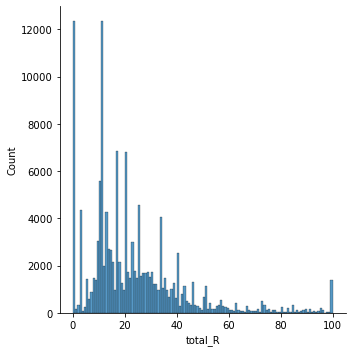

In [22]:

sns.displot(df2[df2['post']<20000]['total_R'],bins=120)

## 할인율

/Users/luci031/opt/anaconda3/envs/spark/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/luci031/opt/anaconda3/envs/spark/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/luci031/opt/anaconda3/envs/spark/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a

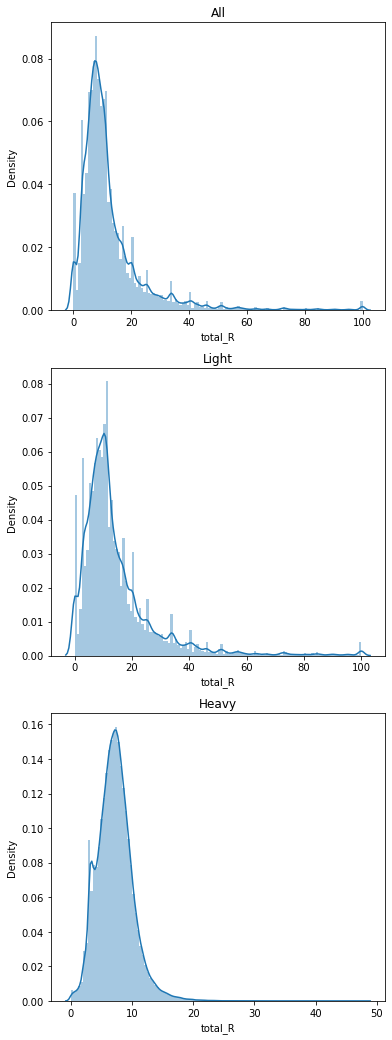

In [58]:
plt.figure(figsize=(6,18),facecolor='white')
plt.subplot(311)
plt.title('All')
sns.distplot(df2['total_R'],bins=120)
plt.subplot(312)
plt.title('Light')
sns.distplot(df2_l['total_R'],bins=120)
plt.subplot(313)
plt.title('Heavy')
sns.distplot(df2_h['total_R'],bins=120)
plt.show()

In [71]:
def total_R1(sub_loc1,sub_loc2,title,df2):
    plt.subplot(sub_loc1)
    a = df2.groupby('push').sum()['post'].reset_index()
    plt.bar(df2.groupby('total_R').sum()['post'].index,df2.groupby('total_R').sum()['post'])
    current_values = plt.gca().get_yticks()
    plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

    plt.subplot(sub_loc2)
    b = df2.groupby('push').mean()['post'].reset_index()
    plt.title(f'avg of purchases({title})')
    plt.bar(df2.groupby('total_R').mean()['post'].index,df2.groupby('total_R').mean()['post'])
    current_values = plt.gca().get_yticks()
    plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_3946/3646250469.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_3946/3646250469.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_3946/3646250469.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_3946/3646250469.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_3946/3646250469.py:

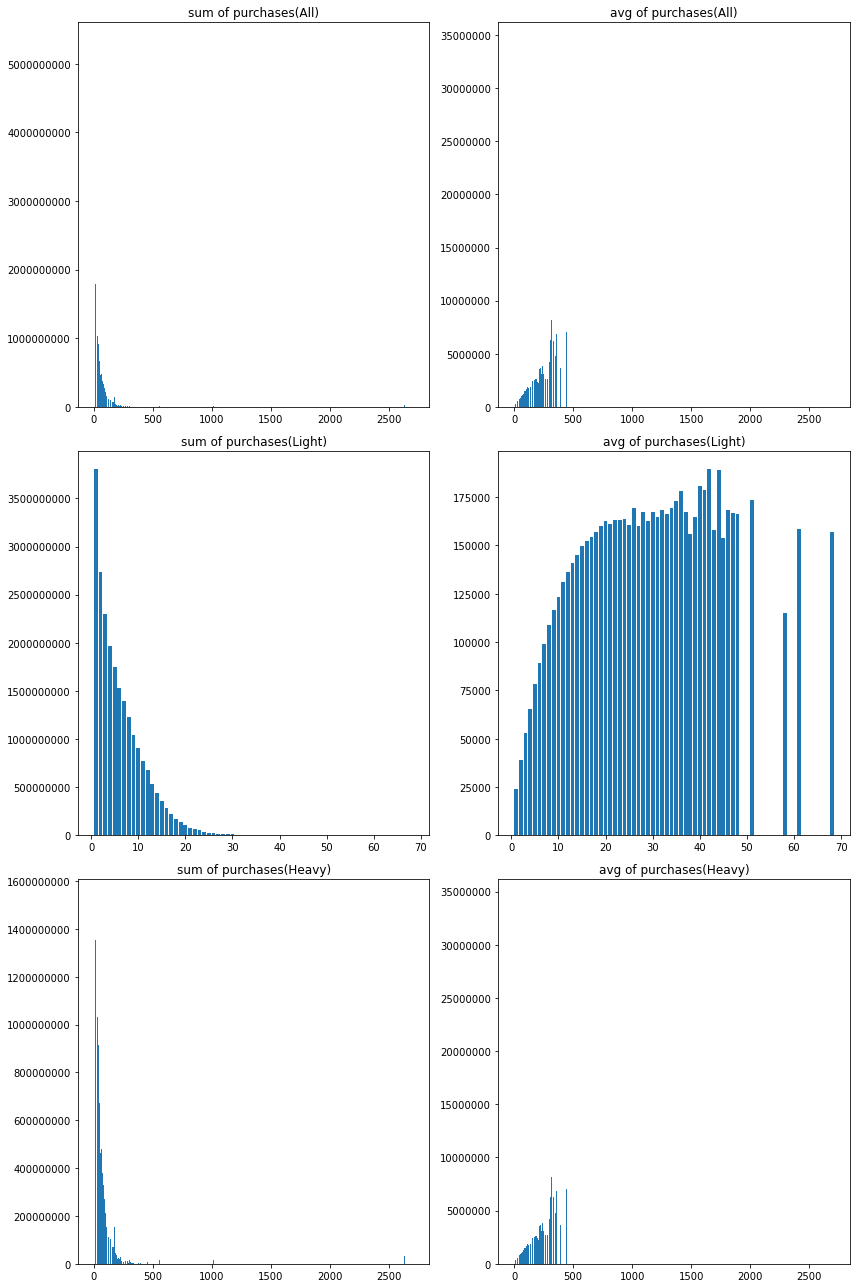

In [72]:
plt.figure(figsize=(12,18),facecolor="white")
cnt_b2(321,322,'All',df2)
cnt_b2(323,324,'Light',df2_l)
cnt_b2(325,326,'Heavy',df2_h)

plt.tight_layout()
plt.show()

In [173]:
#눈에 띄는 지점 기준으로 나누기
print('~5%')
display(df2[df2['total_R']<5].describe())
print('5~9%')
display(df2[(df2['total_R']>=5) & (df2['total_R']<9)].describe())
print('9~15%')
display(df2[(df2['total_R']>=9) & (df2['total_R']<15)].describe())
print('15%~')
display(df2[df2['total_R']>=15].describe())

~5%


,id,age,man,push,frgn,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b
count,90688.000,90688.000,90688.000,90688.000,90688.000,90688.000,90688.000,90688.000,90688.000,90688.000,90688.000,90688.000,90688.000,90688.000,90688.000
mean,272848.112,35.308,0.422,0.403,0.007,307522.749,298638.536,1640.636,8884.213,10524.849,0.762,2.050,2.811,1.000,6.216
std,157113.911,11.018,0.494,0.491,0.085,1063422.031,1034308.187,6023.597,30538.256,32356.960,1.130,1.677,1.561,0.000,20.568
min,4.000,15.000,0.000,0.000,0.000,500.000,500.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000
25%,136714.750,28.000,0.000,0.000,0.000,28567.500,28000.000,0.000,0.000,717.000,0.000,0.000,2.100,1.000,1.000
50%,272834.500,34.000,0.000,0.000,0.000,93500.000,91000.000,0.000,2000.000,3000.000,0.000,2.300,3.200,1.000,2.000
75%,408816.500,41.000,1.000,1.000,0.000,275400.000,269200.000,1194.000,7350.000,9350.000,1.400,3.500,4.000,1.000,6.000
max,544909.000,121.000,1.000,1.000,1.000,115005350.000,112273800.000,851803.000,2731550.000,2731550.000,4.900,4.900,4.900,1.000,2705.000


5~9%


,id,age,man,push,frgn,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b
count,164562.000,164562.000,164562.000,164562.000,164562.000,164562.000,164562.000,164562.000,164562.000,164562.000,164562.000,164562.000,164562.000,164562.000,164562.000
mean,272452.462,36.595,0.297,0.463,0.008,351238.979,329378.067,2536.183,21860.912,24397.095,0.639,6.391,7.030,1.000,17.695
std,157134.836,10.061,0.457,0.499,0.087,505852.925,475971.935,6626.947,31149.804,34857.378,0.993,1.631,1.124,0.000,26.621
min,15.000,15.000,0.000,0.000,0.000,1400.000,1400.000,0.000,0.000,70.000,0.000,0.000,5.000,1.000,1.000
25%,136451.500,29.000,0.000,0.000,0.000,69310.000,64800.000,0.000,4000.000,5000.000,0.000,5.400,6.100,1.000,3.000
50%,272402.000,36.000,0.000,0.000,0.000,174300.000,163070.500,465.000,10900.000,12000.000,0.200,6.600,7.100,1.000,8.000
75%,408436.500,42.000,1.000,1.000,0.000,425935.000,398577.250,2357.000,26857.000,29745.750,0.900,7.600,8.000,1.000,21.000
max,544920.000,121.000,1.000,1.000,1.000,22250915.000,21100913.000,249438.000,1150002.000,1330657.000,5.000,8.900,8.900,1.000,487.000


9~15%


,id,age,man,push,frgn,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b
count,156457.000,156457.000,156457.000,156457.000,156457.000,156457.000,156457.000,156457.000,156457.000,156457.000,156457.000,156457.000,156457.000,156457.000,156457.000
mean,272325.294,37.190,0.329,0.427,0.005,155839.040,139732.542,688.360,16106.498,16794.858,0.305,11.024,11.329,1.000,10.816
std,157476.498,11.042,0.470,0.495,0.070,266674.796,241346.395,2922.164,25750.535,27476.758,0.722,1.805,1.618,0.000,19.328
min,6.000,16.000,0.000,0.000,0.000,900.000,800.000,0.000,100.000,100.000,0.000,4.000,9.000,1.000,1.000
25%,135768.000,30.000,0.000,0.000,0.000,29700.000,26148.000,0.000,3396.000,3500.000,0.000,9.700,10.000,1.000,2.000
50%,272419.000,37.000,0.000,0.000,0.000,68802.000,60927.000,0.000,7740.000,8000.000,0.000,11.000,11.100,1.000,4.000
75%,408860.000,42.000,1.000,1.000,0.000,166890.000,148939.000,315.000,17836.000,18365.000,0.200,12.300,12.600,1.000,11.000
max,544921.000,121.000,1.000,1.000,1.000,8063204.000,7434512.000,114411.000,628692.000,727749.000,5.000,14.900,14.900,1.000,430.000


15%~


,id,age,man,push,frgn,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b
count,133214.000,133214.000,133214.000,133214.000,133214.000,133214.000,133214.000,133214.000,133214.000,133214.000,133214.000,133214.000,133214.000,133214.000,133214.000
mean,272367.396,37.753,0.427,0.364,0.003,37275.140,29239.741,120.273,8035.398,8155.671,0.160,28.028,28.188,1.000,3.423
std,157446.032,13.969,0.495,0.481,0.059,59521.635,49566.382,896.346,10591.468,11077.264,0.617,16.183,16.121,0.000,6.300
min,1.000,15.000,0.000,0.000,0.000,2500.000,0.000,0.000,1000.000,1000.000,0.000,10.000,15.000,1.000,1.000
25%,136084.750,30.000,0.000,0.000,0.000,11600.000,7900.000,0.000,3880.750,3890.000,0.000,17.500,17.800,1.000,1.000
50%,272349.500,36.000,0.000,0.000,0.000,20800.000,15400.000,0.000,5000.000,5000.000,0.000,22.300,22.500,1.000,1.000
75%,408709.250,42.000,1.000,1.000,0.000,38579.750,30600.000,0.000,8000.000,8232.000,0.000,32.700,32.800,1.000,3.000
max,544917.000,121.000,1.000,1.000,1.000,2167429.000,1850084.000,40736.000,555096.000,555096.000,5.000,100.000,100.000,1.000,213.000


## 시간대별

### 날짜별

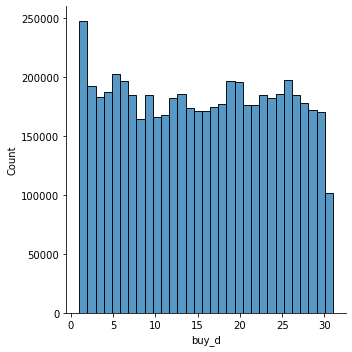

In [177]:
sns.displot(df1['buy_d'],bins=31)

/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_2479/3751378546.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_2479/3751378546.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


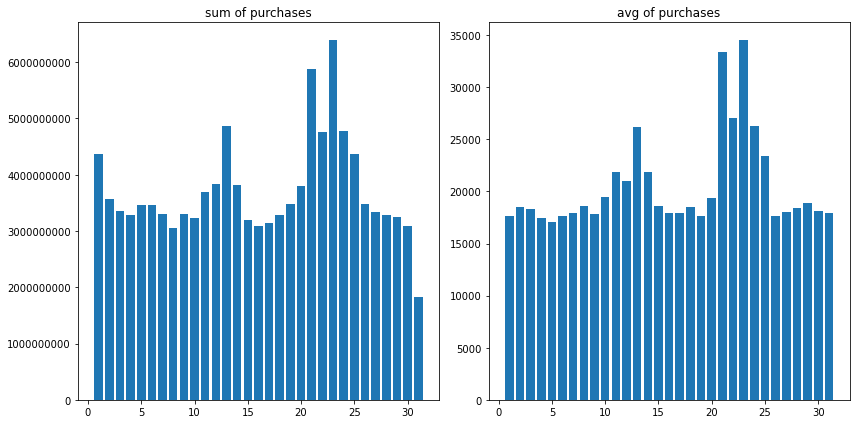

In [178]:
plt.figure(figsize=(12,6),facecolor="white")
plt.subplot(1,2,1)
plt.title("sum of purchases")
plt.bar(df1.groupby('buy_d').sum()['pre'].index,df1.groupby('buy_d').sum()['pre'])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

plt.subplot(1,2,2)
plt.title("avg of purchases")
plt.bar(df1.groupby('buy_d').mean()['pre'].index,df1.groupby('buy_d').mean()['pre'])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

plt.tight_layout()
plt.show()

In [189]:
# 인당 평균 구매일
a = df1.groupby('id').mean().reset_index()[['id','buy_d']]
def truncs(num):
    return int(num//1)
a['buy_d'] = a['buy_d'].apply(truncs)
a['buy_d'] = a['buy_d'].astype(int)
df3 = df3.merge(a,on='id')

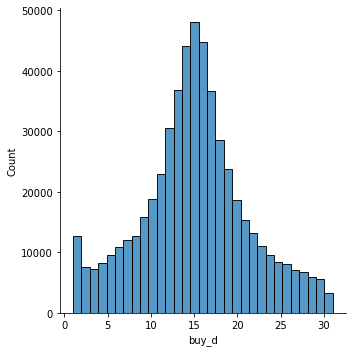

In [196]:
sns.displot(df3['buy_d'],bins=31)

/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_2479/810107199.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_2479/810107199.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


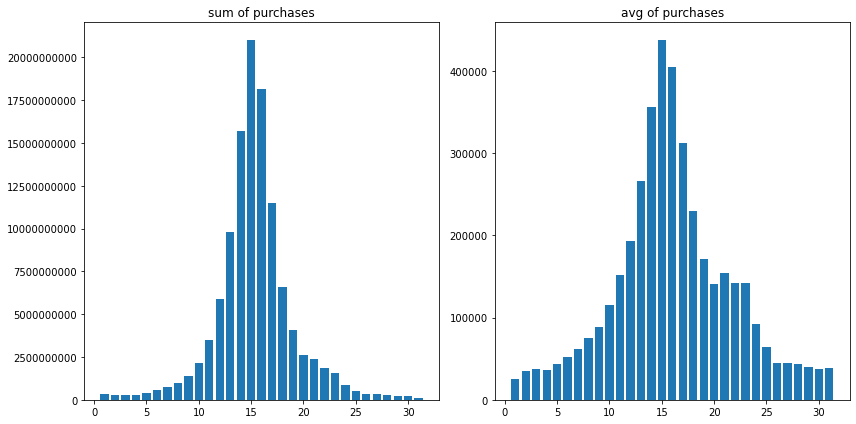

In [197]:
plt.figure(figsize=(12,6),facecolor="white")
plt.subplot(1,2,1)
plt.title("sum of purchases")
plt.bar(df3.groupby('buy_d').sum()['pre'].index,df3.groupby('buy_d').sum()['pre'])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

plt.subplot(1,2,2)
plt.title("avg of purchases")
plt.bar(df3.groupby('buy_d').mean()['pre'].index,df3.groupby('buy_d').mean()['pre'])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

plt.tight_layout()
plt.show()

## 외국인별, merchant_id 별

##